In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [17]:
expedia_df = pd.read_csv(r"C:\Users\User\Downloads\updated_expedia_data.csv")

In [18]:
expedia_df

,Snapshot,Hotel Name,TTT,LOS,Grade,Num of,Curr Price,Original Price,Percentage of discount,Distance from center,Type of room,Is refundable,Late payment,Breakfast included,Option Member,rating-star,location_rating
0,01:31.7,Hyatt Grand Central New York,1.0,1.0,8.08,"3,574",174,205,15.1,0.0,"Room, 1 Queen Bed, Accessible, Bathtub",False,False,False,False,4.0,NaN
1,01:31.8,Hotel 32 32,1.0,1.0,8.08,"1,616",148,197,24.9,0.0,Full Studio with Balcony,False,False,False,False,4.0,NaN
2,01:31.8,Millennium Hilton New York One UN Plaza,1.0,1.0,8.08,"1,351",200,NaN,NaN,0.0,1 Queen Bed,False,False,False,False,4.0,NaN
3,01:31.8,"PUBLIC, an Ian Schrager hotel",1.0,1.0,8.28,"2,575",319,NaN,NaN,0.0,Queen Hi-Floor,False,False,False,True,NaN,NaN
4,01:31.8,The Westin New York Grand Central,1.0,1.0,8.88,"2,517",199,406,51.0,0.0,"Traditional Room, 1 King Bed (Mobility Accessi...",False,False,False,False,4.0,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37795,21:30.7,Omni Berkshire Place,30.0,5.0,9.29,"1,170",326,407,0.0,0.0,"Deluxe Room, 1 King Bed",False,False,False,False,4.0,9.6
37796,21:30.8,Hotel Richland LES,30.0,5.0,8.68,168,193,214,0.0,0.0,City View King Bed Room,False,False,False,True,3.0,NaN
37797,21:30.8,The Sohotel,30.0,5.0,8.48,"1,000",255,336,0.0,0.0,"Standard Room, 1 Queen Bed",False,False,False,True,NaN,NaN
37798,21:30.8,Concorde Hotel New York,30.0,5.0,9.09,"1,007",324,381,0.0,0.0,Deluxe Room,False,False,False,True,4.0,9.2


In [19]:
expedia_df = expedia_df.rename(columns={'Hotel Name': "name", "Grade": "score", "Num of ": "reviews", "Curr Price": "price_per_night", "Original Price": "original_price", "Percentage of discount": "discount_perc", "Distance from center": "km_from_center"})

In [20]:
expedia_df = expedia_df.rename(columns={"Is refundable": "Free_cancellation", "Late payment": "No_payment", "Breakfast included": "Breakfast", "rating-star": "star_rating"})

In [21]:
expedia_df

,Snapshot,name,TTT,LOS,score,reviews,price_per_night,original_price,discount_perc,km_from_center,Type of room,Free_cancellation,No_payment,Breakfast,Option Member,star_rating,location_rating
0,01:31.7,Hyatt Grand Central New York,1.0,1.0,8.08,"3,574",174,205,15.1,0.0,"Room, 1 Queen Bed, Accessible, Bathtub",False,False,False,False,4.0,NaN
1,01:31.8,Hotel 32 32,1.0,1.0,8.08,"1,616",148,197,24.9,0.0,Full Studio with Balcony,False,False,False,False,4.0,NaN
2,01:31.8,Millennium Hilton New York One UN Plaza,1.0,1.0,8.08,"1,351",200,NaN,NaN,0.0,1 Queen Bed,False,False,False,False,4.0,NaN
3,01:31.8,"PUBLIC, an Ian Schrager hotel",1.0,1.0,8.28,"2,575",319,NaN,NaN,0.0,Queen Hi-Floor,False,False,False,True,NaN,NaN
4,01:31.8,The Westin New York Grand Central,1.0,1.0,8.88,"2,517",199,406,51.0,0.0,"Traditional Room, 1 King Bed (Mobility Accessi...",False,False,False,False,4.0,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37795,21:30.7,Omni Berkshire Place,30.0,5.0,9.29,"1,170",326,407,0.0,0.0,"Deluxe Room, 1 King Bed",False,False,False,False,4.0,9.6
37796,21:30.8,Hotel Richland LES,30.0,5.0,8.68,168,193,214,0.0,0.0,City View King Bed Room,False,False,False,True,3.0,NaN
37797,21:30.8,The Sohotel,30.0,5.0,8.48,"1,000",255,336,0.0,0.0,"Standard Room, 1 Queen Bed",False,False,False,True,NaN,NaN
37798,21:30.8,Concorde Hotel New York,30.0,5.0,9.09,"1,007",324,381,0.0,0.0,Deluxe Room,False,False,False,True,4.0,9.2


In [22]:
def remove_exceptions(df):
...     # Ensure the price column is treated as a string, remove non-numeric characters, and handle empty strings
...     df['price_per_night'] = df['price_per_night'].astype(str).str.replace(r'\D', '', regex=True)
... 
...     # Replace empty strings with NaN
...     df['price_per_night'].replace('', np.nan, inplace=True)
... 
...     # Drop rows with NaN values in the price_per_night column
...     df.dropna(subset=['price_per_night'], inplace=True)
... 
...     # Convert the price_per_night column to float
...     df['price_per_night'] = df['price_per_night'].astype(float)
... 
...     # Calculate Q1 (25th percentile) and Q3 (75th percentile)
...     Q1 = df['price_per_night'].quantile(0.25)
...     Q3 = df['price_per_night'].quantile(0.75)
... 
...     # Calculate the IQR (Interquartile Range)
...     IQR = Q3 - Q1
... 
...     # Determine the lower and upper bounds for outliers
...     lower_bound = Q1 - 1.5 * IQR
...     upper_bound = Q3 + 1.5 * IQR
... 
...     # Remove outliers
...     df_no_outliers = df[(df['price_per_night'] >= lower_bound) & (df['price_per_night'] <= upper_bound)]
... 
...     print(f"Original DataFrame shape: {df.shape}")
...     print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")
...     
...     return df_no_outliers

In [23]:
print(remove_exceptions(expedia_df))

Original DataFrame shape: (37650, 17)
DataFrame shape after removing outliers: (35372, 17)
      Snapshot                                     name   TTT  LOS  score  \
0      01:31.7             Hyatt Grand Central New York   1.0  1.0   8.08   
1      01:31.8                              Hotel 32 32   1.0  1.0   8.08   
2      01:31.8  Millennium Hilton New York One UN Plaza   1.0  1.0   8.08   
3      01:31.8            PUBLIC, an Ian Schrager hotel   1.0  1.0   8.28   
4      01:31.8        The Westin New York Grand Central   1.0  1.0   8.88   
...        ...                                      ...   ...  ...    ...   
37794  21:30.7                     110th Boutique Hotel  30.0  5.0   8.08   
37795  21:30.7                     Omni Berkshire Place  30.0  5.0   9.29   
37796  21:30.8                       Hotel Richland LES  30.0  5.0   8.68   
37797  21:30.8                              The Sohotel  30.0  5.0   8.48   
37798  21:30.8                  Concorde Hotel New York  30.0 

In [24]:
def create_vizual(df):
    # Ensure the reviews column is treated as a string and clean it
    df['reviews'] = df['reviews'].astype(str).str.replace(r'\D', '', regex=True)
    df['reviews'] = df['reviews'].replace('', '0').astype(int)  # Replace empty strings with '0' and convert to int
    # Clean the necessary columns
    df['score'] = df['score'].astype(str).str.extract('(\d+\.?\d*)').astype(float)
    df['price_per_night'] = df['price_per_night'].astype(str).str.extract('(\d+\.?\d*)').astype(float)
    df['price_per_night'] = df['price_per_night'].astype(str).str.extract('(\d+\.?\d*)').astype(float)
    # Create a DataFrame where each hotel appears only once
    df_unique_hotels = df.drop_duplicates(subset='name')
    # Plot distributions using Matplotlib for unique hotels
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    # Number of reviews distribution
    axs[0].hist(df_unique_hotels['reviews'], bins=50, color='skyblue', edgecolor='black')
    axs[0].set_title('Distribution of Number of Reviews')
    axs[0].set_xlabel('Number of Reviews')
    axs[0].set_ylabel('Frequency')
    # Hotel score distribution
    axs[1].hist(df_unique_hotels['score'], bins=50, color='salmon', edgecolor='black')
    axs[1].set_title('Distribution of Hotel Scores')
    axs[1].set_xlabel('Hotel Score')
    axs[1].set_ylabel('Frequency')
    # Price per night distribution
    axs[2].hist(df['price_per_night'], bins=50, color='lightgreen', edgecolor='black')
    axs[2].set_title('Distribution of Prices per Night')
    axs[2].set_xlabel('Price per Night')
    axs[2].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    # Plot distributions using Seaborn for unique hotels
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    # Number of reviews distribution
    sns.histplot(df_unique_hotels['reviews'], bins=50, kde=True, ax=axs[0], color='skyblue')
    axs[0].set_title('Distribution of Number of Reviews')
    axs[0].set_xlabel('Number of Reviews')
    axs[0].set_ylabel('Frequency')
    # Hotel score distribution
    sns.histplot(df_unique_hotels['score'], bins=50, kde=True, ax=axs[1], color='salmon')
    axs[1].set_title('Distribution of Hotel Scores')
    axs[1].set_xlabel('Hotel Score')
    axs[1].set_ylabel('Frequency')
    # Price per night distribution
    sns.histplot(df['price_per_night'], bins=50, kde=True, ax=axs[2], color='lightgreen')
    axs[2].set_title('Distribution of Prices per Night')
    axs[2].set_xlabel('Price per Night')
    axs[2].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

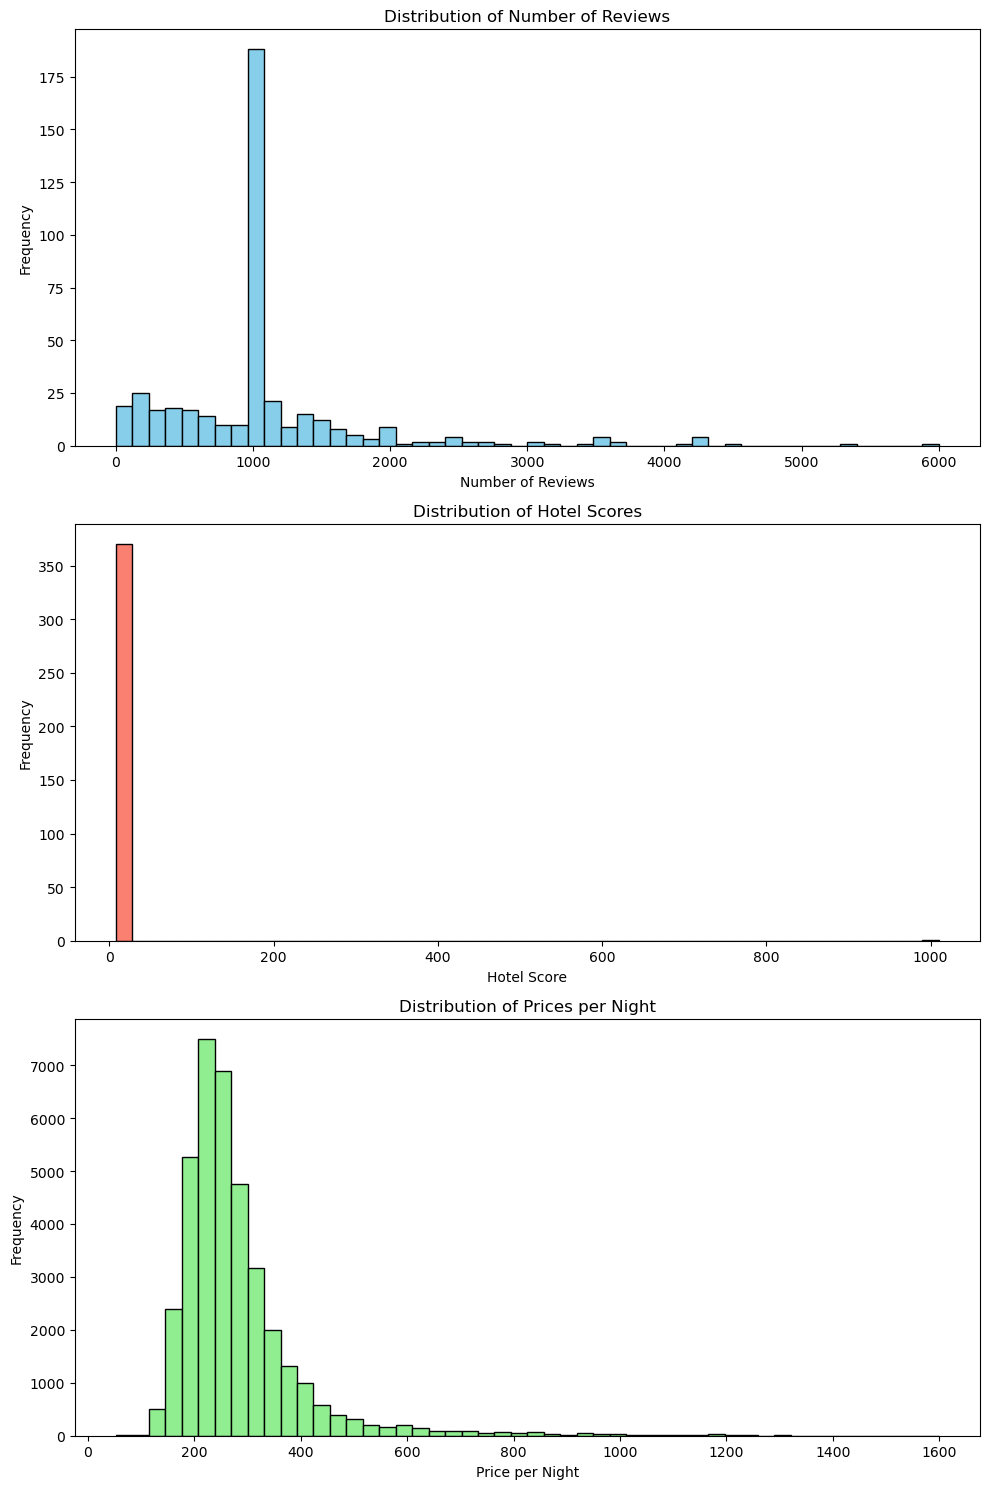

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


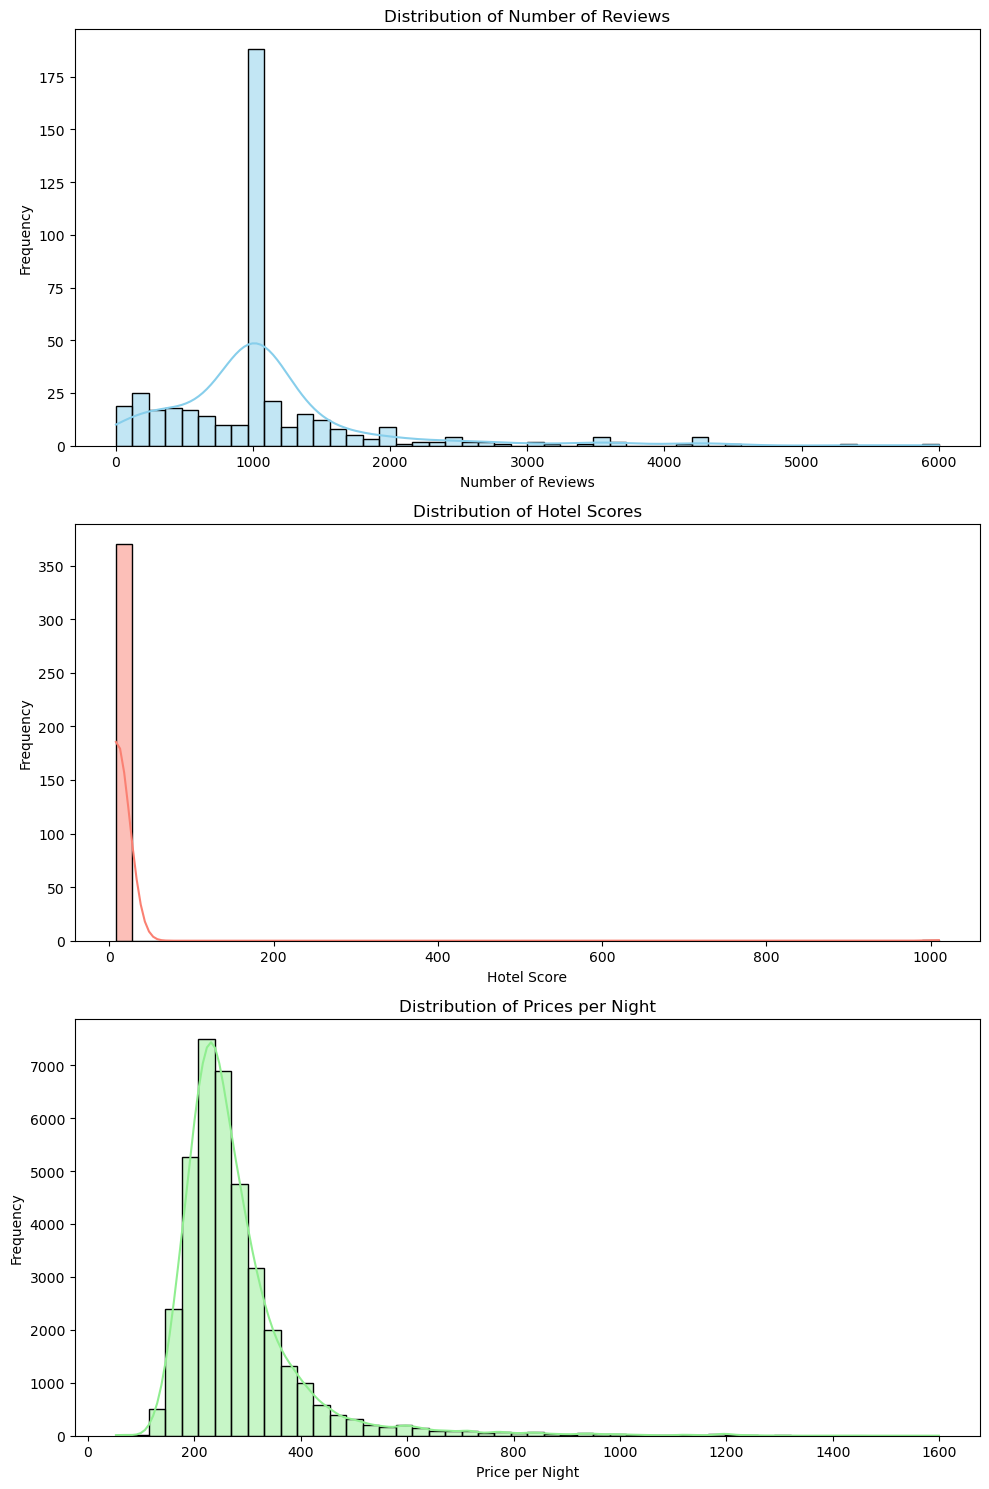

In [25]:
create_vizual(expedia_df)

In [26]:
booking_df = pd.read_csv(r"C:\Users\User\Downloads\20_06_hotels_data_cleaned.csv")

In [27]:
booking_df

,name,location,score,reviews,room_type,bed_type,price,availability,url,star_rating,...,Limited_rooms,TTT,Breakfast,index,neighborhood,km_from_center,LOS,price_per_night,room_rate,neighborhood_category
0,U.S. Pacific Hotel,NaN,5.6,2437.0,Standard Double (No Window),New YorkShow on map5.7 km from centreMetro ac...,129.0,"1 night, 2 adults",https://www.booking.com/hotel/us/us-pacific.en...,1.0,...,4,1,0,1,Chinatown,5.70,1,129.0,1,Downtown Manhattan
1,Hudson Yard 408,NaN,4.9,42.0,Double Room,New YorkShow on map1.9 km from centreMetro ac...,158.0,"1 night, 2 adults",https://www.booking.com/hotel/us/hudson-new-yo...,NaN,...,2,1,0,2,Hudson Yards,1.90,1,158.0,1,Midtown Manhattan
2,Carlton Arms Hotel,NaN,7.4,1978.0,Double Room with Shared Bathroom,New YorkShow on map3.1 km from centreMetro ac...,161.0,"1 night, 2 adults",https://www.booking.com/hotel/us/carlton-arms....,2.0,...,3,1,0,3,Gramercy,3.10,1,161.0,1,Midtown Manhattan
3,Bowery Grand Hotel,NaN,3.5,1406.0,Standard Single Room with Shared Bathroom,New YorkShow on map5.6 km from centreMetro ac...,189.0,"1 night, 2 adults",https://www.booking.com/hotel/us/bowery-grand....,1.0,...,0,1,0,4,Lower East Side,5.60,1,189.0,1,Downtown Manhattan
4,West Side YMCA,NaN,6.6,13556.0,Bunk Bed Room with Shared Bathroom,New YorkShow on map350 m from centreMetro access,169.0,"1 night, 2 adults",https://www.booking.com/hotel/us/west-side-ymc...,3.0,...,5,1,0,5,Upper West Side,0.35,1,169.0,0,Uptown Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23678,Fairfield Inn & Suites by Marriott New York Ma...,NaN,8.2,6793.0,1 King Bed,New YorkShow on map1.9 km from centreMetro ac...,1506.0,"5 nights, 2 adults",https://www.booking.com/hotel/us/fairfield-inn...,4.0,...,5,30,1,165,Hell's Kitchen,1.90,5,301.2,3,Midtown Manhattan
23679,Freehand New York,NaN,7.8,1877.0,Premium Queen,New YorkShow on map3.1 km from centreMetro ac...,1511.0,"5 nights, 2 adults",https://www.booking.com/hotel/us/freehand-new-...,4.0,...,0,30,0,166,Gramercy,3.10,5,302.2,2,Midtown Manhattan
23680,American Dream Guest House,NaN,9.0,4.0,Double Room with Shared Bathroom,New YorkShow on map1.1 km from centre,1511.0,"5 nights, 2 adults",https://www.booking.com/hotel/us/american-drea...,NaN,...,1,30,0,167,Hell's Kitchen,1.10,5,302.2,1,Midtown Manhattan
23681,Courtyard by Marriott Times Square West,NaN,8.2,2796.0,King Room,New YorkShow on map1.8 km from centreMetro ac...,1514.0,"5 nights, 2 adults",https://www.booking.com/hotel/us/new-york-manh...,3.0,...,5,30,0,168,Hell's Kitchen,1.80,5,302.8,3,Midtown Manhattan


In [29]:
expedia_shared_hotels = expedia_df[expedia_df["name"].isin(booking_df["name"].unique().tolist())]

In [33]:
print(f"amount of shared hotels between expedia and booking: {len(expedia_shared_hotels['name'].unique())}")

amount of shared hotels between expedia and booking: 197


In [34]:
expedia_shared_hotels

,Snapshot,name,TTT,LOS,score,reviews,price_per_night,original_price,discount_perc,km_from_center,Type of room,Free_cancellation,No_payment,Breakfast,Option Member,star_rating,location_rating
0,01:31.7,Hyatt Grand Central New York,1.0,1.0,8.08,3574,174.0,205,15.1,0.0,"Room, 1 Queen Bed, Accessible, Bathtub",False,False,False,False,4.0,NaN
1,01:31.8,Hotel 32 32,1.0,1.0,8.08,1616,148.0,197,24.9,0.0,Full Studio with Balcony,False,False,False,False,4.0,NaN
2,01:31.8,Millennium Hilton New York One UN Plaza,1.0,1.0,8.08,1351,200.0,NaN,NaN,0.0,1 Queen Bed,False,False,False,False,4.0,NaN
4,01:31.8,The Westin New York Grand Central,1.0,1.0,8.88,2517,199.0,406,51.0,0.0,"Traditional Room, 1 King Bed (Mobility Accessi...",False,False,False,False,4.0,9.3
6,01:31.8,Hotel St. James,1.0,1.0,8.68,4251,202.0,224,9.8,0.0,"One Full Bed, Standard",False,False,False,True,2.0,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37791,21:30.7,Courtyard by Marriott New York World Trade Cen...,30.0,5.0,8.88,530,265.0,NaN,0.0,0.0,"Room, 1 King Bed",False,False,False,False,3.0,NaN
37793,21:30.7,Renaissance New York Chelsea Hotel,30.0,5.0,8.48,607,290.0,363,0.0,0.0,"Room, 1 King Bed",False,False,False,False,4.0,NaN
37795,21:30.7,Omni Berkshire Place,30.0,5.0,9.29,1170,326.0,407,0.0,0.0,"Deluxe Room, 1 King Bed",False,False,False,False,4.0,9.6
37796,21:30.8,Hotel Richland LES,30.0,5.0,8.68,168,193.0,214,0.0,0.0,City View King Bed Room,False,False,False,True,3.0,NaN


In [35]:
expedia_shared_hotels["neighborhood_category"] = None

C:\Users\User\AppData\Local\Temp\ipykernel_17024\3508631449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expedia_shared_hotels["neighborhood_category"] = None


In [37]:
expedia_shared_hotels = expedia_shared_hotels.drop("neighborhood_category", axis=1)

In [43]:
booking_unique_hotels_df = booking_df[['name', 'neighborhood_category']].drop_duplicates(subset='name').reset_index(drop=True)

In [44]:
booking_unique_hotels_df

,name,neighborhood_category
0,U.S. Pacific Hotel,Downtown Manhattan
1,Hudson Yard 408,Midtown Manhattan
2,Carlton Arms Hotel,Midtown Manhattan
3,Bowery Grand Hotel,Downtown Manhattan
4,West Side YMCA,Uptown Manhattan
...,...,...
393,The Wallace Hotel,Uptown Manhattan
394,Hilton Club The Quin New York,Unknown/Other
395,New York City GuestHouse,Uptown Manhattan
396,Sonder Henri on 24,Downtown Manhattan


In [46]:
expedia_shared_hotels = expedia_shared_hotels.merge(booking_unique_hotels_df, on="name", how='left')

In [47]:
expedia_shared_hotels

,Snapshot,name,TTT,LOS,score,reviews,price_per_night,original_price,discount_perc,km_from_center,Type of room,Free_cancellation,No_payment,Breakfast,Option Member,star_rating,location_rating,neighborhood_category
0,01:31.7,Hyatt Grand Central New York,1.0,1.0,8.08,3574,174.0,205,15.1,0.0,"Room, 1 Queen Bed, Accessible, Bathtub",False,False,False,False,4.0,NaN,Midtown Manhattan
1,01:31.8,Hotel 32 32,1.0,1.0,8.08,1616,148.0,197,24.9,0.0,Full Studio with Balcony,False,False,False,False,4.0,NaN,Unknown/Other
2,01:31.8,Millennium Hilton New York One UN Plaza,1.0,1.0,8.08,1351,200.0,NaN,NaN,0.0,1 Queen Bed,False,False,False,False,4.0,NaN,Midtown Manhattan
3,01:31.8,The Westin New York Grand Central,1.0,1.0,8.88,2517,199.0,406,51.0,0.0,"Traditional Room, 1 King Bed (Mobility Accessi...",False,False,False,False,4.0,9.3,Midtown Manhattan
4,01:31.8,Hotel St. James,1.0,1.0,8.68,4251,202.0,224,9.8,0.0,"One Full Bed, Standard",False,False,False,True,2.0,9.7,Unknown/Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19302,21:30.7,Courtyard by Marriott New York World Trade Cen...,30.0,5.0,8.88,530,265.0,NaN,0.0,0.0,"Room, 1 King Bed",False,False,False,False,3.0,NaN,Unknown/Other
19303,21:30.7,Renaissance New York Chelsea Hotel,30.0,5.0,8.48,607,290.0,363,0.0,0.0,"Room, 1 King Bed",False,False,False,False,4.0,NaN,Midtown Manhattan
19304,21:30.7,Omni Berkshire Place,30.0,5.0,9.29,1170,326.0,407,0.0,0.0,"Deluxe Room, 1 King Bed",False,False,False,False,4.0,9.6,Midtown Manhattan
19305,21:30.8,Hotel Richland LES,30.0,5.0,8.68,168,193.0,214,0.0,0.0,City View King Bed Room,False,False,False,True,3.0,NaN,Downtown Manhattan


In [50]:
def find_correlations(df):
    # Drop 'location_rating' and 'price' columns if they exist
    df_temp = df.drop(columns=['location_rating', 'price'], errors='ignore')

    # Select only numeric columns
    numeric_df = df_temp.select_dtypes(include=[float, int])
    
    # Remove rows with null values in numeric columns
    numeric_df = numeric_df.dropna()
    
    # Verify the data types and the content of the dataframe
    print("Data Types in Numeric DataFrame:")
    print(numeric_df.dtypes)
    print("\nFirst Few Rows of Numeric DataFrame:")
    print(numeric_df.head())
    
    # Check if we have any numeric columns left after dropping NA values
    if numeric_df.empty:
        print("No numeric data available after preprocessing.")
    else:
        # Calculate the correlation matrix
        correlation_matrix = numeric_df.corr()
    
        # Display the correlation matrix
        print("Correlation Matrix:")
        print(correlation_matrix)
    
        # Visualize the correlation matrix using a heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Matrix Heatmap')
        plt.show()
    
        # Visualize the strong relationships
        # Identify strong correlations (e.g., correlation coefficient > 0.5 or < -0.5)
        strong_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)].stack().reset_index()
        strong_correlations = strong_correlations[strong_correlations['level_0'] != strong_correlations['level_1']]
        strong_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']
    
        # Plot the relationships for strong correlations
        for _, row in strong_correlations.iterrows():
            feature1 = row['Feature 1']
            feature2 = row['Feature 2']
            correlation = row['Correlation']
            
            plt.figure(figsize=(8, 6))
            sns.scatterplot(data=numeric_df, x=feature1, y=feature2)
            plt.title(f'Scatter Plot between {feature1} and {feature2} (Correlation: {correlation:.2f})')
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.show()
    
        # Specifically visualize the relationship between 'price_per_night' and other parameters
        if 'price_per_night' in numeric_df.columns:
            price_correlations = correlation_matrix['price_per_night'].sort_values(ascending=False)
            print("Price per Night Correlations:")
            print(price_correlations)
    
            # Plot the relationships for 'price_per_night'
            for feature in price_correlations.index:
                if feature != 'price_per_night':
                    plt.figure(figsize=(8, 6))
                    sns.scatterplot(data=numeric_df, x=feature, y='price_per_night')
                    plt.title(f'Scatter Plot between {feature} and price_per_night (Correlation: {price_correlations[feature]:.2f})')
                    plt.xlabel(feature)
                    plt.ylabel('price_per_night')
                    plt.show()
        else:
            print("Column 'price_per_night' not found in the numerical columns.")

Data Types in Numeric DataFrame:
TTT                float64
LOS                float64
score              float64
reviews              int32
price_per_night    float64
discount_perc      float64
km_from_center     float64
star_rating        float64
dtype: object

First Few Rows of Numeric DataFrame:
   TTT  LOS  score  reviews  price_per_night  discount_perc  km_from_center  \
0  1.0  1.0   8.08     3574            174.0           15.1             0.0   
1  1.0  1.0   8.08     1616            148.0           24.9             0.0   
3  1.0  1.0   8.88     2517            199.0           51.0             0.0   
4  1.0  1.0   8.68     4251            202.0            9.8             0.0   
5  1.0  1.0   8.08     3574            174.0           15.1             0.0   

   star_rating  
0          4.0  
1          4.0  
3          4.0  
4          2.0  
5          4.0  
Correlation Matrix:
                      TTT       LOS     score   reviews  price_per_night  \
TTT              1.000000 

C:\Users\User\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


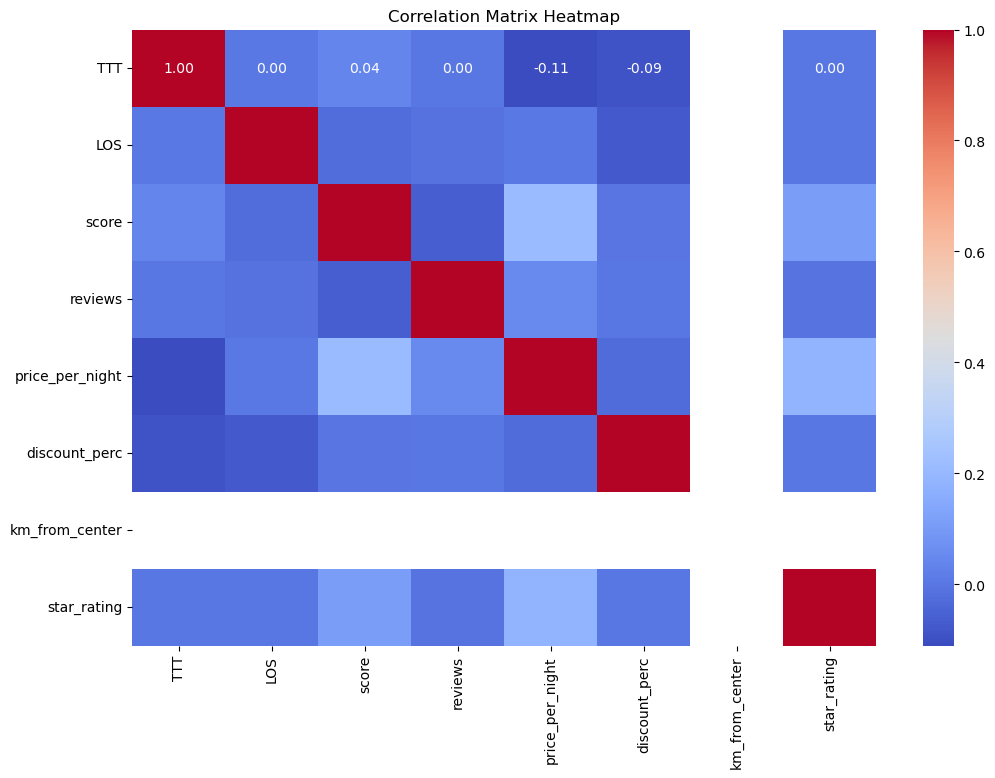

Price per Night Correlations:
price_per_night    1.000000
score              0.207524
star_rating        0.183847
reviews            0.051864
LOS                0.004125
discount_perc     -0.031180
TTT               -0.110267
km_from_center          NaN
Name: price_per_night, dtype: float64


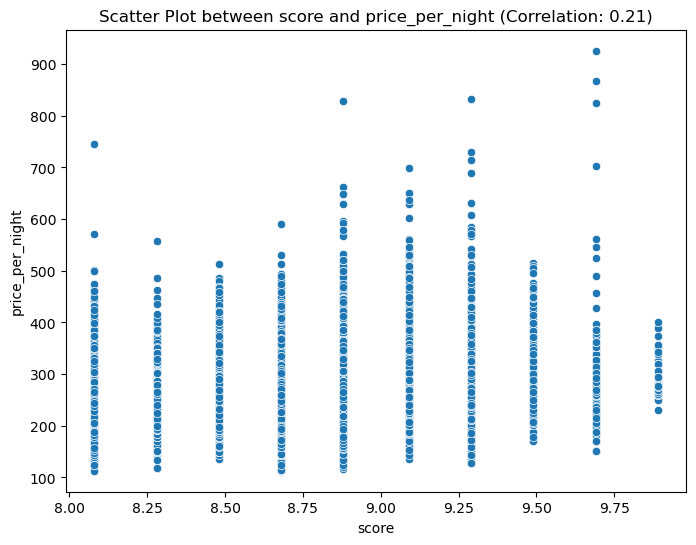

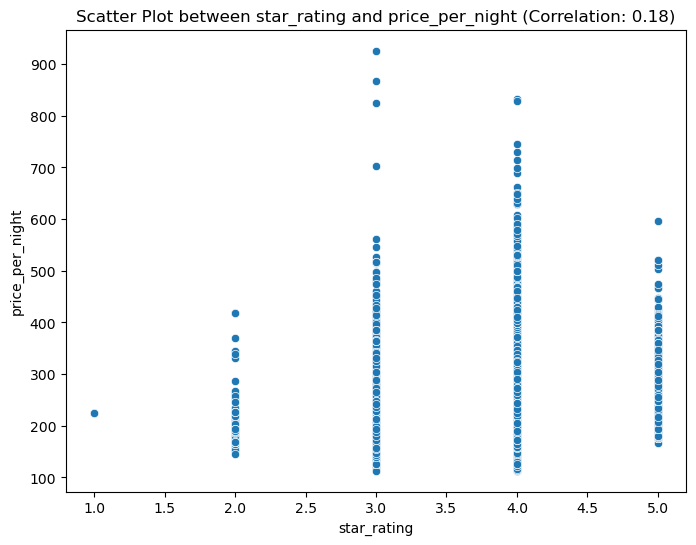

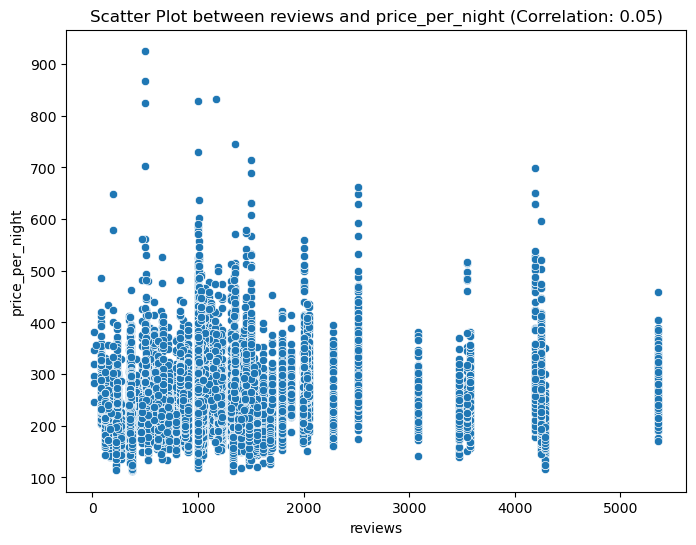

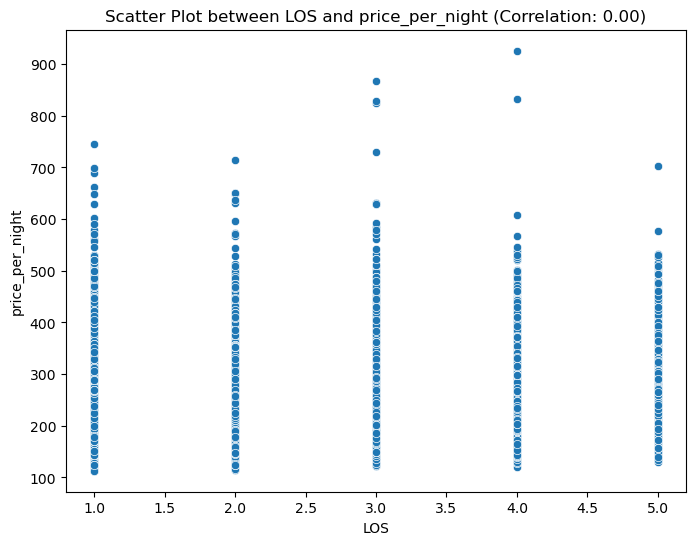

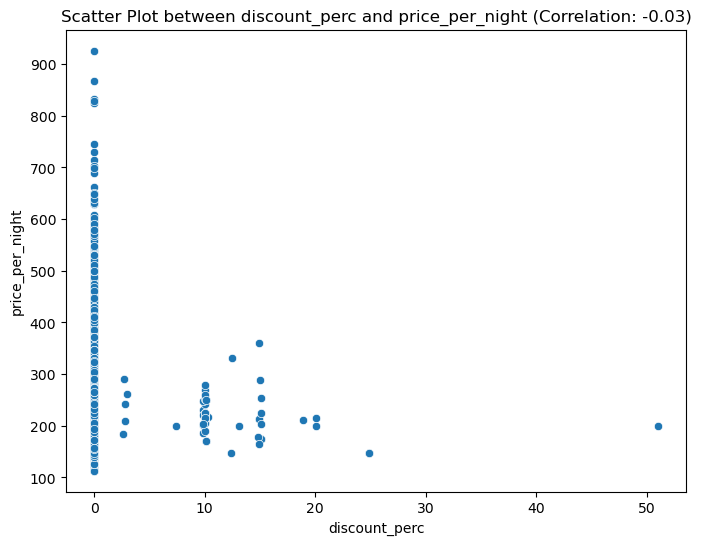

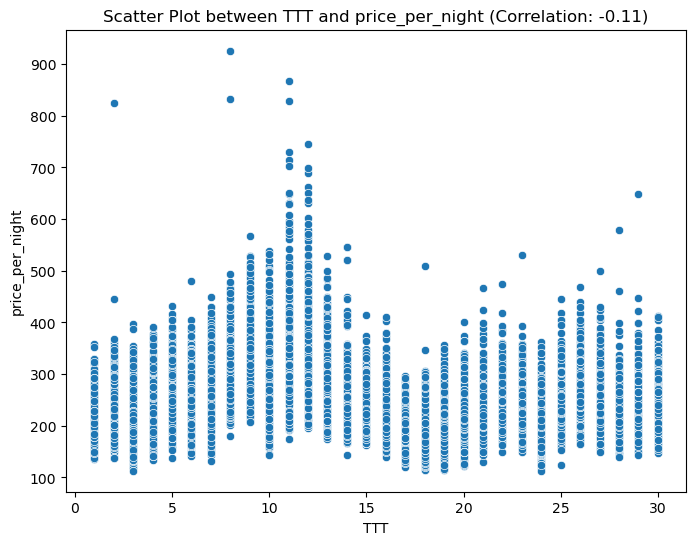

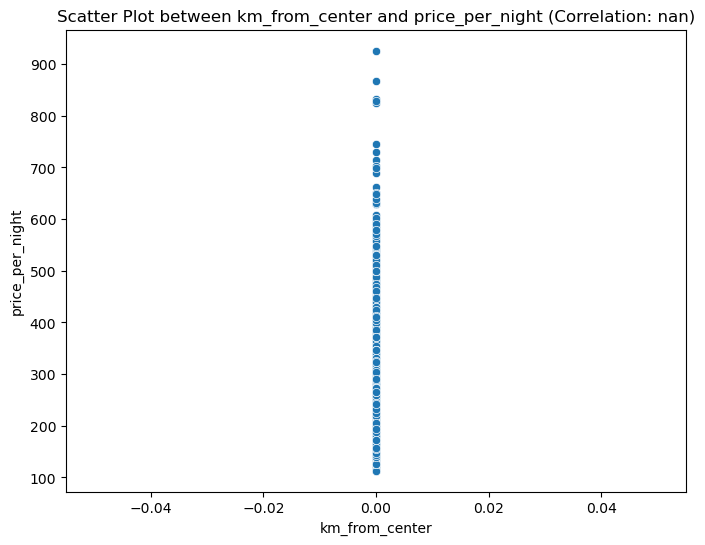

In [51]:
find_correlations(expedia_shared_hotels)